In [1]:
import pandas as pd

# Load the dataset

elon_tweets = pd.read_csv("elon_musk_tweets.csv")


In [2]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (if not already downloaded)
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Preprocess text
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

# Apply preprocessing to tweets
elon_tweets['clean_text'] = elon_tweets['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TANISH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TANISH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TANISH\AppData\Roaming\nltk_data...


In [3]:
elon_tweets['clean_text']

0       billym2k find gold toe sock inevitably kilter ...
1                                sock con conference sock
2       always something new magazine cover article pr...
3                                  explainthisbob guy get
4       sock tech advanced get pretty much anything so...
                              ...                        
5899                                   jonerlichman wrong
5900                alifarhat79 guy think maybe took much
5901                                         sriramk cool
5902                         cb_doge time complete circle
5903            jason late stage civilization complacency
Name: clean_text, Length: 5904, dtype: object

In [6]:
!pip install textblob
from textblob import TextBlob

# Sentiment analysis function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify polarity as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to tweets
elon_tweets['sentiment'] = elon_tweets['clean_text'].apply(analyze_sentiment)


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 487.6 kB/s eta 0:00:02
   ------------ --------------------------- 194.6/626.3 kB 1.5 MB/s eta 0:00:01
   -------------------------------- ------- 501.8/626.3 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.0 MB/s eta 0:00:00


In [7]:
elon_tweets['sentiment']

0       Negative
1        Neutral
2       Positive
3        Neutral
4       Positive
          ...   
5899    Negative
5900    Positive
5901    Positive
5902    Positive
5903    Negative
Name: sentiment, Length: 5904, dtype: object

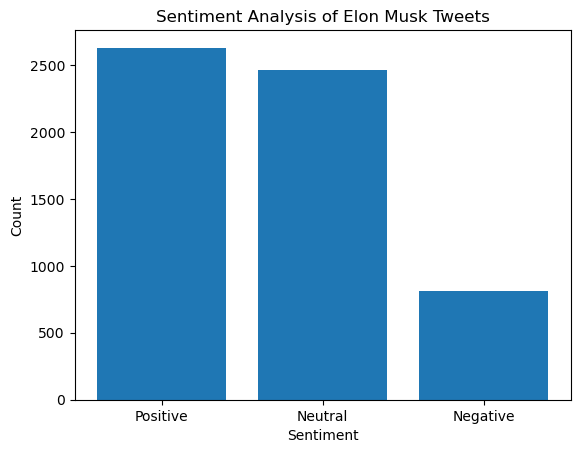

sentiment
Positive    2629
Neutral     2465
Negative     810
Name: count, dtype: int64


In [8]:
# Count sentiment labels
sentiment_counts = elon_tweets['sentiment'].value_counts()

# Plot sentiment distribution
import matplotlib.pyplot as plt

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis of Elon Musk Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Print sentiment distribution
print(sentiment_counts)
